In [1]:
import numpy as np
def Q(d,k):
    if(k<=1 or k<2*d or k>6*d):return 0
    if(d==1):
        return 1/5.0
    res = np.array([Q(d-1,k-j) for j in range(2,7)])
    return res.sum() / 5.0

def P(d,k):
    if(k==1): return 1-(5/6)**d
    if((k>=2 and k<=2*d-1) or k>6*d):return 0
    return (5/6)**d*Q(d,k)


In [2]:
print(sum([P(5,d) for d in range(50)]))

0.9999999999999998


In [3]:
N=200
D=10
tab_P = np.zeros((D+1,6*D+1))
for d in range(1,D+1):
    print(d)
    for n in range(1,6*D+1):
        tab_P[d][n] = P(d,n)


1
2
3
4
5
6
7
8
9
10


In [4]:
def Ep(d):
    return 4*d*((5/6)**d) + 1 - (5/6)**d

In [6]:
tab_E=np.ones((N,N,2))*-2
def EG(i,j,D,N,E):
    if i >= N:
        return 1,0
    if j >= N:
        return -1,0
    if(E[i,j][0]!=-2):return E[i,j]
    res_max=-10000
    d_opt=0
    for d in range(1,D+1):
        cum = 0
        for k in range(1,6*d+1):
            if(i+k>=N):
                cum += tab_P[d,k] * -1
            else:
                if(E[j,i+k][0]==-2):
                    E[j,i+k]=EG(j,i+k,D,N,E)
                cum += tab_P[d,k] * E[j,i+k][0]
        if(res_max<-cum):
            res_max=-cum
            d_opt=d
    E[i,j]=res_max,d_opt
    return E[i,j]
    
    
        
        

In [7]:
[EG(i,j,D,N,tab_E) for i in range(N) for j in range(N)]

[array([0.04802264, 6.        ]),
 array([0.03718702, 6.        ]),
 array([0.02631812, 6.        ]),
 array([0.0154181, 6.       ]),
 array([4.48911489e-03, 6.00000000e+00]),
 array([-0.00646666,  6.        ]),
 array([-0.01744701,  6.        ]),
 array([-0.0284498,  6.       ]),
 array([-0.03947304,  6.        ]),
 array([-0.05051483,  6.        ]),
 array([-0.06157342,  6.        ]),
 array([-0.07264716,  6.        ]),
 array([-0.08373453,  6.        ]),
 array([-0.09483404,  6.        ]),
 array([-0.10594426,  6.        ]),
 array([-0.11706377,  6.        ]),
 array([-0.12819114,  6.        ]),
 array([-0.13932483,  6.        ]),
 array([-0.15046316,  6.        ]),
 array([-0.16160428,  6.        ]),
 array([-0.17274609,  6.        ]),
 array([-0.18388615,  6.        ]),
 array([-0.1950217,  6.       ]),
 array([-0.20614971,  6.        ]),
 array([-0.21726759,  6.        ]),
 array([-0.2284072,  6.       ]),
 array([-0.23954208,  6.        ]),
 array([-0.25065873,  6.        ]),
 a

In [8]:
tab_E[0,0]

array([0.04802264, 6.        ])

In [10]:
r=np.random.random_sample()
len(np.array([tab_P[3,:i+1].sum() for i in range(1,6*3+1)])-r>0)


18

In [13]:
import math
def strategie_aveugle(i,j,D,N):
    return int(np.argmax(np.array([Ep(x) for x in range(1,D+1)])))

def strategie_optimale(i,j,D,N):
    res=EG(i,j,D,N,tab_E)
    return int(res[1])

def strategie_aleatoire(i,j,D,N):
    return math.ceil(np.random.random_sample()*D)

def calcule_points(d):
    if d == 0: return 0
    res=0
    for i in range(d):
        r=np.random.random_sample()
        res+=math.ceil(r*100/16.6666667)
    return res

In [14]:
def jouer(D,N,s1,s2,nb):
    g1=0
    g2=0
    for t in range(nb):
        i=0
        j=0
        while(i<N and j<N):
            if(s1==0):
                di=strategie_aveugle(i,j,D,N)#le nombre de dés lancer par j1
            if(s1==1):
                di=strategie_optimale(i,j,D,N)#le nombre de dés lancer par j1
            if(s1==2):
                di=strategie_aleatoire(i,j,D,N)#le nombre de dés lancer par j1
                
            ki=calcule_points(di)
            
            if(s2==0):
                dj=strategie_aveugle(i,j,D,N)#le nombre de dés lancer par j2
            if(s2==1):
                dj=strategie_optimale(j,i+ki,D,N)#le nombre de dés lancer par j2
            if(s2==2):
                dj=strategie_aleatoire(i,j,D,N)#le nombre de dés lancer par j2
                
            kj=calcule_points(dj)
            
            #print("ki= ",ki, "kj = ",kj)
            i+=ki
            j+=kj
            #print("i= ",i, "j = ",j)
        if(i>=N):
            g1+=1
            g2-=1
        else:
            g1-=1
            g2+=1
    return g1/nb
    

In [41]:
import matplotlib.pyplot as plt
def trace(s1,s2,nb,p_nb,D=10,N=200):
    res=np.array([jouer(D,i,s1,s2,nb) for i in range(30,N)])
    for a in range(1,p_nb):
        res+=np.array([jouer(D,i,s1,s2,nb) for i in range(30,N)])
    plt.plot([i for i in range(30,N)],res/p_nb) 
    plt.show()

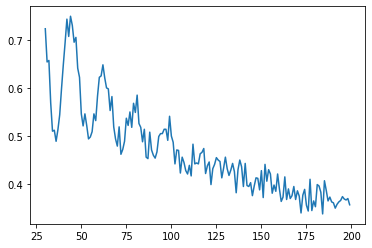

In [42]:
trace(0,0,20,100)

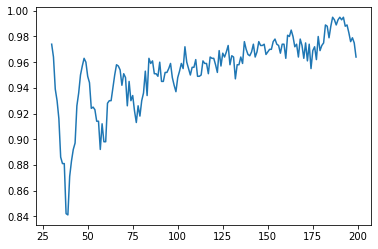

In [43]:
trace(1,0,20,100)

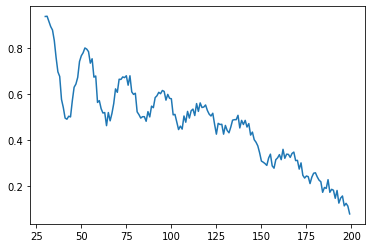

In [44]:
trace(1,1,20,100)

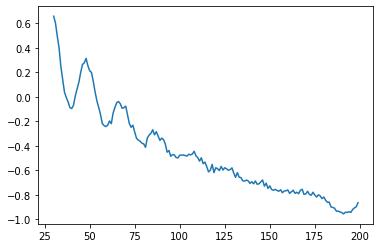

In [45]:
trace(0,1,20,100)

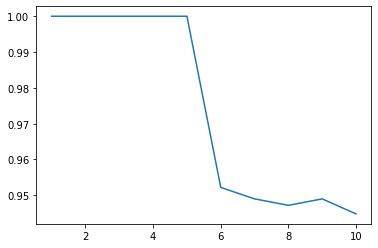

In [23]:
plt.plot([i for i in range(1,11)],[jouer(i,100,1,0,10000) for i in range(1,11)]) 
plt.show()